## IMPORTING LIBRARIES

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTING DATASET

In [36]:
df = pd.read_csv('Flight_delay.csv')

In [37]:
df.head(10)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16
5,4,03-01-2019,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,70,49,37,51,ISP,Long Island MacArthur Airport,BWI,Baltimore-Washington International Airport,220,2,5,0,N,0,12,0,0,0,25
6,4,03-01-2019,1657,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57,70,47,19,32,ISP,Long Island MacArthur Airport,BWI,Baltimore-Washington International Airport,220,5,5,0,N,0,7,0,0,0,12
7,4,03-01-2019,1422,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155,195,143,47,87,ISP,Long Island MacArthur Airport,FLL,Fort Lauderdale-Hollywood International Airport,1093,6,6,0,N,0,40,0,0,0,7
8,4,03-01-2019,2107,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147,165,134,64,82,ISP,Long Island MacArthur Airport,MCO,Orlando International Airport,972,6,7,0,N,0,5,0,0,0,59
9,4,03-01-2019,1812,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135,145,118,72,82,ISP,Long Island MacArthur Airport,MDW,Chicago Midway International Airport,765,6,11,0,N,0,3,0,0,0,69


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484551 entries, 0 to 484550
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DayOfWeek          484551 non-null  int64 
 1   Date               484551 non-null  object
 2   DepTime            484551 non-null  int64 
 3   ArrTime            484551 non-null  int64 
 4   CRSArrTime         484551 non-null  int64 
 5   UniqueCarrier      484551 non-null  object
 6   Airline            484551 non-null  object
 7   FlightNum          484551 non-null  int64 
 8   TailNum            484551 non-null  object
 9   ActualElapsedTime  484551 non-null  int64 
 10  CRSElapsedTime     484551 non-null  int64 
 11  AirTime            484551 non-null  int64 
 12  ArrDelay           484551 non-null  int64 
 13  DepDelay           484551 non-null  int64 
 14  Origin             484551 non-null  object
 15  Org_Airport        483374 non-null  object
 16  Dest               4

In [39]:
df.isna().sum() #HANDLING NULL VALUES

DayOfWeek               0
Date                    0
DepTime                 0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
Airline                 0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Org_Airport          1177
Dest                    0
Dest_Airport         1479
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

In [40]:
df.dtypes

DayOfWeek             int64
Date                 object
DepTime               int64
ArrTime               int64
CRSArrTime            int64
UniqueCarrier        object
Airline              object
FlightNum             int64
TailNum              object
ActualElapsedTime     int64
CRSElapsedTime        int64
AirTime               int64
ArrDelay              int64
DepDelay              int64
Origin               object
Org_Airport          object
Dest                 object
Dest_Airport         object
Distance              int64
TaxiIn                int64
TaxiOut               int64
Cancelled             int64
CancellationCode     object
Diverted              int64
CarrierDelay          int64
WeatherDelay          int64
NASDelay              int64
SecurityDelay         int64
LateAircraftDelay     int64
dtype: object

In [41]:
df['CRSArrTime'].describe()

count    484551.000000
mean       1652.129929
std         466.096216
min           1.000000
25%        1339.000000
50%        1723.000000
75%        2025.000000
max        2359.000000
Name: CRSArrTime, dtype: float64

In [42]:
pd.set_option('display.max_columns',30)
df.head()


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16


In [43]:
df['Org_Airport'].value_counts()

Chicago O'Hare International Airport                46945
Dallas/Fort Worth International Airport             33027
Hartsfield-Jackson Atlanta International Airport    28834
Denver International Airport                        23543
Los Angeles International Airport                   17194
                                                    ...  
Dillingham Airport                                      9
King Salmon Airport                                     9
Adak Airport                                            7
Bellingham International Airport                        2
Westerly State Airport                                  1
Name: Org_Airport, Length: 259, dtype: int64

In [44]:
df1 = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df1

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484546,5,13-06-2019,1609,1942,1915,AA,American Airlines Inc.,1496,N510AA,153,160,131,27,34,DFW,Dallas/Fort Worth International Airport,MCO,Orlando International Airport,984,7,15,0,N,0,27,0,0,0,0
484547,6,14-06-2019,1616,1954,1915,AA,American Airlines Inc.,1496,N559AA,158,160,136,39,41,DFW,Dallas/Fort Worth International Airport,MCO,Orlando International Airport,984,11,11,0,N,0,11,0,0,0,28
484548,2,17-06-2019,1617,2002,1915,AA,American Airlines Inc.,1496,N505AA,165,160,141,47,42,DFW,Dallas/Fort Worth International Airport,MCO,Orlando International Airport,984,7,17,0,N,0,0,22,5,0,20
484549,7,22-06-2019,1607,1941,1915,AA,American Airlines Inc.,1496,N421AA,154,160,137,26,32,DFW,Dallas/Fort Worth International Airport,MCO,Orlando International Airport,984,5,12,0,N,0,1,0,0,0,25


In [45]:
df1.isna().sum()

DayOfWeek            0
Date                 0
DepTime              0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
Airline              0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Org_Airport          0
Dest                 0
Dest_Airport         0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [46]:
df1['CancellationCode'].unique()

array(['N'], dtype=object)

## Parsing

In [47]:
def change_into_datetime(col):
    df1[col]=pd.to_datetime(df1[col])

In [48]:
#converting datatype of date and time columns from string into datetime format.  

for i in ['Date']:
    change_into_datetime(i)


In [49]:
df1.dtypes

DayOfWeek                     int64
Date                 datetime64[ns]
DepTime                       int64
ArrTime                       int64
CRSArrTime                    int64
UniqueCarrier                object
Airline                      object
FlightNum                     int64
TailNum                      object
ActualElapsedTime             int64
CRSElapsedTime                int64
AirTime                       int64
ArrDelay                      int64
DepDelay                      int64
Origin                       object
Org_Airport                  object
Dest                         object
Dest_Airport                 object
Distance                      int64
TaxiIn                        int64
TaxiOut                       int64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                  int64
WeatherDelay                  int64
NASDelay                      int64
SecurityDelay               

In [50]:
df1['journey_day'] = df1['Date'].dt.day
df1['journey_month'] = df1['Date'].dt.month


In [51]:
df1.head(2)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,journey_day,journey_month
0,4,2019-03-01,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,...,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,1,3
1,4,2019-03-01,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,...,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,1,3


In [52]:
df1['UniqueCarrier'].unique()

array(['WN', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'HA', 'MQ', 'AA', 'AS',
       'B6'], dtype=object)

In [53]:
cat_col=[col for col in df1.columns if df1[col].dtype=='O']
cat_col

['UniqueCarrier',
 'Airline',
 'TailNum',
 'Origin',
 'Org_Airport',
 'Dest',
 'Dest_Airport',
 'CancellationCode']

In [54]:
cont_col=[col for col in df1.columns if df1[col].dtype!='O']
cont_col

['DayOfWeek',
 'Date',
 'DepTime',
 'ArrTime',
 'CRSArrTime',
 'FlightNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'journey_day',
 'journey_month']

In [55]:
data=[df1['CarrierDelay'],df1['WeatherDelay'],df1['NASDelay'],df1['SecurityDelay'],df1['LateAircraftDelay']]
headers = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
df2 = pd.concat(data, axis=1, keys=headers)
df2.head()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2,0,0,0,32
1,10,0,0,0,47
2,8,0,0,0,72
3,3,0,0,0,12
4,0,0,0,0,16


In [56]:
df2.isin([0]).sum()

CarrierDelay         226046
WeatherDelay         450243
NASDelay             234084
SecurityDelay        482359
LateAircraftDelay    181451
dtype: int64

In [57]:
df2['outcome'] = 0
df2.loc[df2.loc[(df2.iloc[:,:-1].nunique(axis=1) == 1) & (df2.iloc[:,:-1] == 0).all(axis=1)].index, 'outcome'] = 1

In [58]:
df2[df2['outcome']==0]

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,outcome
0,2,0,0,0,32,0
1,10,0,0,0,47,0
2,8,0,0,0,72,0
3,3,0,0,0,12,0
4,0,0,0,0,16,0
...,...,...,...,...,...,...
484546,27,0,0,0,0,0
484547,11,0,0,0,28,0
484548,0,22,5,0,20,0
484549,1,0,0,0,25,0


In [59]:
#Finding unique airlines in 'Airline' column
Airlines=df.Airline.unique()
len(Airlines)

12

In [60]:
#returns counts of each unique values
value=df.Airline.value_counts()
value

Southwest Airlines Co.          119048
American Airlines Inc.           73053
American Eagle Airlines Inc.     58698
United Air Lines Inc.            56896
Skywest Airlines Inc.            50384
US Airways Inc.                  31755
Delta Air Lines Inc.             30220
Atlantic Southeast Airlines      28678
JetBlue Airways                  15364
Alaska Airlines Inc.             10000
Frontier Airlines Inc.            9015
Hawaiian Airlines Inc.            1440
Name: Airline, dtype: int64

<AxesSubplot:>

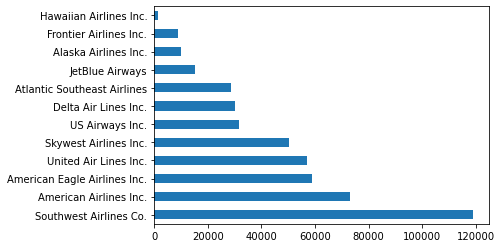

In [61]:
#Horizontal bar plot of this value counts
value.plot(kind='barh')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


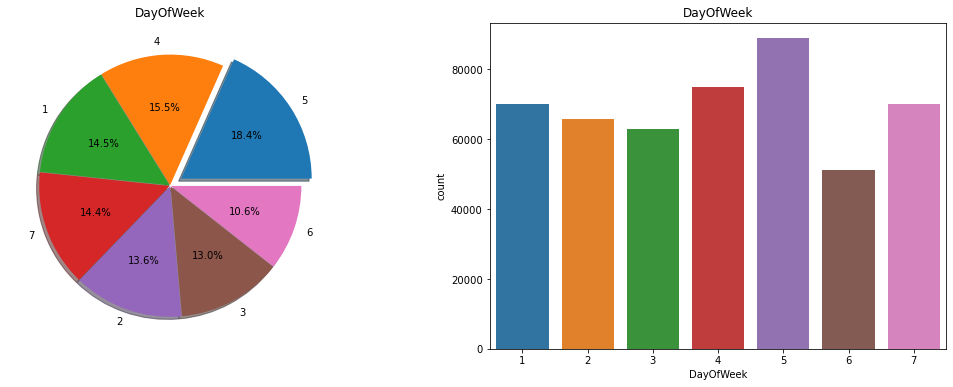

DayOfWeek represents whether the flight was on delayed on Monday-(1),Tuesday-(2),Wednesday - (3),Thursday- (4), Friday- (5), Saturday- (6), Sunday- (7)


In [62]:
# pie plot to show the days of week 
f,ax=plt.subplots(1,2,figsize=(18,6))
df['DayOfWeek'].value_counts().plot.pie(explode=[0.1,0.005,0.005,0.005,0.005,0.005,0.005],\
                                        autopct='%1.1f%%',ax=ax[0],shadow=True) 
ax[0].set_title('DayOfWeek')
ax[0].set_ylabel('')
sns.countplot('DayOfWeek', data=df,ax=ax[1])
ax[1].set_title('DayOfWeek')
plt.show()

print('DayOfWeek represents whether the flight was on delayed on Monday-(1),\
Tuesday-(2),Wednesday - (3),Thursday- (4), Friday- (5), Saturday- (6), Sunday- (7)')

In [71]:
#TO CHANGE THE MISSING DIGIT ------ DepTime - 958 to 0958
df1['DepTime'] = df1.DepTime.map("{:04}".format)
df1.head(50)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,journey_day,journey_month
0,4,2019-03-01,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,...,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,1,3
1,4,2019-03-01,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,...,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,1,3
2,4,2019-03-01,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,...,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,1,3
3,4,2019-03-01,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,...,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,1,3
4,4,2019-03-01,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,...,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,1,3
5,4,2019-03-01,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,70,49,37,51,ISP,...,BWI,Baltimore-Washington International Airport,220,2,5,0,N,0,12,0,0,0,25,1,3
6,4,2019-03-01,1657,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57,70,47,19,32,ISP,...,BWI,Baltimore-Washington International Airport,220,5,5,0,N,0,7,0,0,0,12,1,3
7,4,2019-03-01,1422,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155,195,143,47,87,ISP,...,FLL,Fort Lauderdale-Hollywood International Airport,1093,6,6,0,N,0,40,0,0,0,7,1,3
8,4,2019-03-01,2107,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147,165,134,64,82,ISP,...,MCO,Orlando International Airport,972,6,7,0,N,0,5,0,0,0,59,1,3
9,4,2019-03-01,1812,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135,145,118,72,82,ISP,...,MDW,Chicago Midway International Airport,765,6,11,0,N,0,3,0,0,0,69,1,3


In [72]:
#ADDING COLON AFTER TWO CHARACHTER -----DepTime  - 09:58
df1['DepTime'] =df1['DepTime'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)
df1.head(10)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,journey_day,journey_month
0,4,2019-03-01,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,...,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,1,3
1,4,2019-03-01,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,...,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,1,3
2,4,2019-03-01,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,...,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,1,3
3,4,2019-03-01,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,...,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,1,3
4,4,2019-03-01,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,...,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,1,3
5,4,2019-03-01,14:16,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,70,49,37,51,ISP,...,BWI,Baltimore-Washington International Airport,220,2,5,0,N,0,12,0,0,0,25,1,3
6,4,2019-03-01,16:57,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57,70,47,19,32,ISP,...,BWI,Baltimore-Washington International Airport,220,5,5,0,N,0,7,0,0,0,12,1,3
7,4,2019-03-01,14:22,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155,195,143,47,87,ISP,...,FLL,Fort Lauderdale-Hollywood International Airport,1093,6,6,0,N,0,40,0,0,0,7,1,3
8,4,2019-03-01,21:07,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147,165,134,64,82,ISP,...,MCO,Orlando International Airport,972,6,7,0,N,0,5,0,0,0,59,1,3
9,4,2019-03-01,18:12,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135,145,118,72,82,ISP,...,MDW,Chicago Midway International Airport,765,6,11,0,N,0,3,0,0,0,69,1,3


In [70]:
df1.dtypes

DayOfWeek                     int64
Date                 datetime64[ns]
DepTime                       int64
ArrTime                       int64
CRSArrTime                    int64
UniqueCarrier                object
Airline                      object
FlightNum                     int64
TailNum                      object
ActualElapsedTime             int64
CRSElapsedTime                int64
AirTime                       int64
ArrDelay                      int64
DepDelay                      int64
Origin                       object
Org_Airport                  object
Dest                         object
Dest_Airport                 object
Distance                      int64
TaxiIn                        int64
TaxiOut                       int64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                  int64
WeatherDelay                  int64
NASDelay                      int64
SecurityDelay               

In [73]:
#changing 24:00 to 00:00
#because while changing to Standard Timestamp, we will get error if the column have 24:00 value)
df1['DepTime'] = df1.DepTime.replace(to_replace ='24:', value = '00:', regex = True)
df1.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,journey_day,journey_month
0,4,2019-03-01,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,...,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,1,3
1,4,2019-03-01,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,...,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,1,3
2,4,2019-03-01,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,...,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,1,3
3,4,2019-03-01,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,...,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,1,3
4,4,2019-03-01,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,...,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,1,3


In [76]:
df1['DepTimeStamp'] = df1.Date.map(str) + " " + df1.DepTime
df1.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,journey_day,journey_month,DepTimeStamp
0,4,2019-03-01,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,...,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,1,3,2019-03-01 00:00:00 18:29
1,4,2019-03-01,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,...,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,1,3,2019-03-01 00:00:00 19:37
2,4,2019-03-01,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,...,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,1,3,2019-03-01 00:00:00 16:44
3,4,2019-03-01,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,...,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,1,3,2019-03-01 00:00:00 14:52
4,4,2019-03-01,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,...,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,1,3,2019-03-01 00:00:00 13:23


In [77]:
df1.DepTimeStamp = pd.to_datetime(df1.DepTimeStamp)
df1.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,journey_day,journey_month,DepTimeStamp
0,4,2019-03-01,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,...,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,1,3,2019-03-01 18:29:00
1,4,2019-03-01,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,...,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,1,3,2019-03-01 19:37:00
2,4,2019-03-01,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,...,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,1,3,2019-03-01 16:44:00
3,4,2019-03-01,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,...,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,1,3,2019-03-01 14:52:00
4,4,2019-03-01,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,...,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,1,3,2019-03-01 13:23:00


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Percentage Of Delay Occurance')

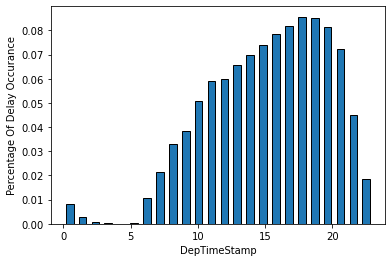

In [78]:
#distribution plot for the 24 hours for all the data
sns.distplot(df1.DepTimeStamp.dt.hour, bins=24 , kde=False, hist_kws={"rwidth":0.6,'edgecolor':'black', 'alpha':1.0},norm_hist=True, )
plt.ylabel("Percentage Of Delay Occurance")

### A High Percentage of Delay occurs between 15:00:00 to 20:00:00 (i.e) 3 PM to 8 PM 

### The flights scheduled to depart at 3 PM to 8 PM delays mostly

### The flights scheduled to depart at 12 AM to 5 AM -less delay


## Month

Text(0.5, 1.0, 'Month vs Delay Occurance')

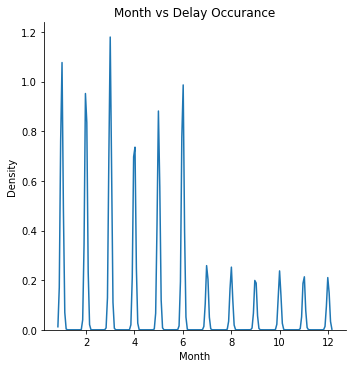

In [83]:
#distribution plot for all the months in the year
sns.displot(df1.DepTimeStamp.dt.month,kind="kde", bw_adjust=0.25 )
plt.xlabel("Month")
plt.title("Month vs Delay Occurance")

## FEATURE SELECTION

In [84]:
df1.corr()

,DayOfWeek,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,journey_day,journey_month
DayOfWeek,1.000000,0.008181,0.013005,-0.012214,0.004801,0.009373,0.007838,-0.002553,0.003026,0.011913,0.011218,-0.016737,NaN,NaN,0.016825,0.001648,-0.026705,0.005742,-0.000288,-0.025761,-0.001072
ArrTime,0.008181,1.000000,0.500790,0.006500,-0.039458,-0.041244,-0.041938,-0.071198,-0.072950,-0.055781,0.030344,-0.009851,NaN,NaN,-0.075551,-0.025724,0.030976,-0.010336,-0.037784,0.013395,-0.005113
CRSArrTime,0.013005,0.500790,1.000000,-0.061340,0.010090,0.022881,0.011534,0.028811,0.045205,0.012401,-0.009451,-0.000575,NaN,NaN,-0.089387,-0.019193,-0.007638,-0.016704,0.143355,0.017078,0.003934
FlightNum,-0.012214,0.006500,-0.061340,1.000000,-0.334002,-0.353528,-0.354269,0.025789,0.016372,-0.369566,0.006770,0.004033,NaN,NaN,0.036285,0.062789,0.038481,-0.000900,-0.059066,0.006220,-0.009355
ActualElapsedTime,0.004801,-0.039458,0.010090,-0.334002,1.000000,0.969723,0.975322,0.091506,0.009281,0.950683,0.175882,0.307644,NaN,NaN,0.029732,-0.004328,0.171725,0.000934,-0.031510,-0.004685,0.005713
CRSElapsedTime,0.009373,-0.041244,0.022881,-0.353528,0.969723,1.000000,0.986646,0.040953,0.036579,0.983551,0.110104,0.133170,NaN,NaN,0.045671,-0.025444,0.047489,0.001622,-0.011532,-0.003953,0.006710
AirTime,0.007838,-0.041938,0.011534,-0.354269,0.975322,0.986646,1.000000,0.039962,0.011101,0.977436,0.097937,0.103518,NaN,NaN,0.037612,-0.024446,0.069138,0.002494,-0.022408,-0.003938,0.006937
ArrDelay,-0.002553,-0.071198,0.028811,0.025789,0.091506,0.040953,0.039962,1.000000,0.948856,0.027744,0.106703,0.220981,NaN,NaN,0.478470,0.266126,0.395434,-0.002701,0.505515,0.000403,-0.004764
DepDelay,0.003026,-0.072950,0.045205,0.016372,0.009281,0.036579,0.011101,0.948856,1.000000,0.027307,0.016591,-0.011958,NaN,NaN,0.505906,0.244019,0.235891,-0.001912,0.541351,0.001557,-0.003831
Distance,0.011913,-0.055781,0.012401,-0.369566,0.950683,0.983551,0.977436,0.027744,0.027307,1.000000,0.089173,0.090829,NaN,NaN,0.046906,-0.029203,0.023654,0.001891,-0.011009,-0.004484,0.010801


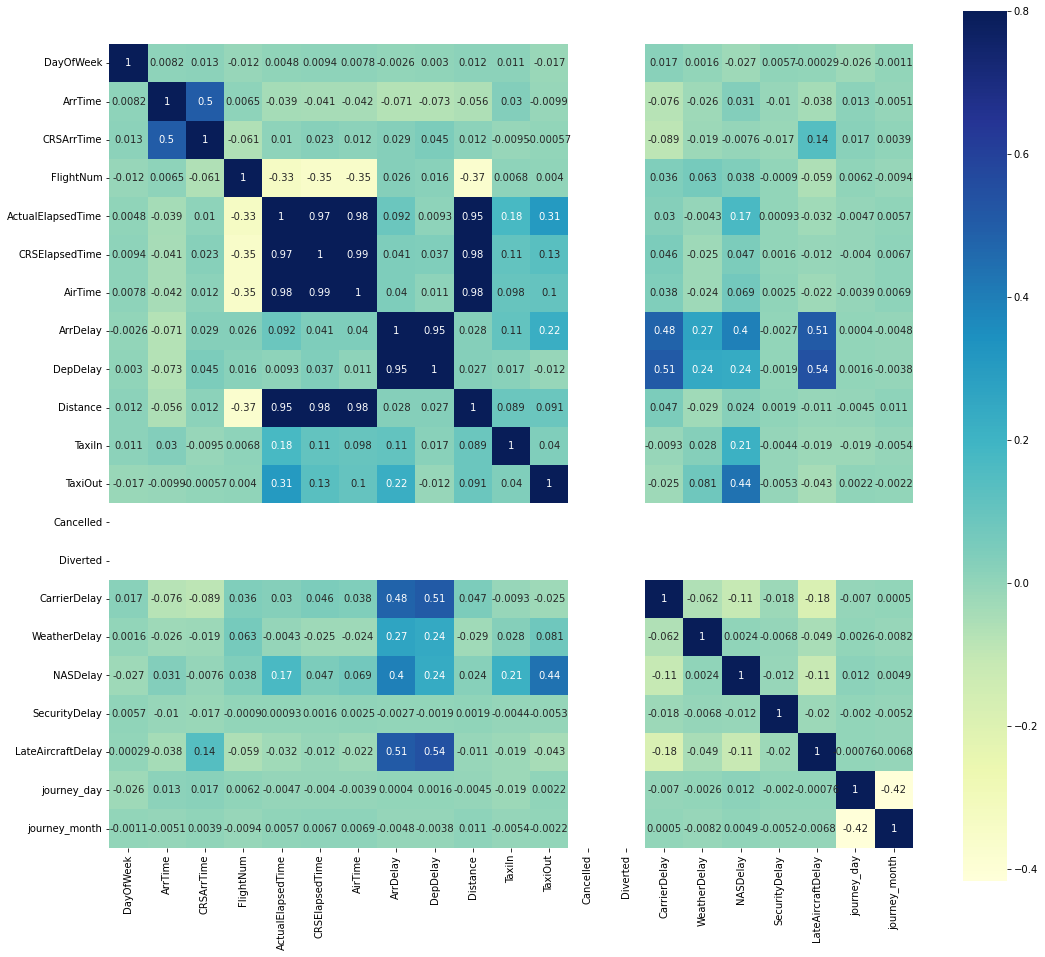

In [89]:
#correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(corrmat, vmax=.8, square=True,  cmap="YlGnBu",annot=True);
plt.show()

In [90]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [91]:
#Length of correlated columns
corr_features = correlation(df, 0.9)
len(set(corr_features))

4

In [92]:
corr_features

{'AirTime', 'CRSElapsedTime', 'DepDelay', 'Distance'}